# Descrição do projeto
A operadora de celular Megaline está insatisfeita com o fato de muitos de seus clientes estarem usando planos antigos. Ela quer desenvolver um modelo que possa analisar o comportamento do cliente e recomendar um dos planos mais recentes da Megaline: Smart ou Ultra.

Você tem acesso a dados de comportamento dos clientes que já mudaram para os novos planos (do projeto do curso de Análise de dados estatísticos). Para essa tarefa de classificação, você precisa desenvolver um modelo que escolhe o plano certo. Como você já executou a etapa de pré-processamento de dados, pode ir direto para a criação do modelo.

Desenvolva um modelo com a maior acurácia possível. Neste projeto, o limite para acurácia é 0,75. Verifique a acurácia usando o conjunto de dados de teste.

# Analise dos dados 
Analise dos dados para conferencia se estao realmente corretos para que possamos criar o modelo da melhor forma possivel, sem nenhum erro.

In [7]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("/Users/Vinicius/Desktop/Data Science/Portfolio/ML/users_behavior.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [14]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [15]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [16]:
df.value_counts()

calls  minutes  messages  mb_used   is_ultra
0.0    0.00     0.0       530.78    1           1
75.0   529.66   20.0      21749.32  0           1
       487.72   60.0      25759.17  0           1
       489.47   7.0       20478.94  1           1
       496.06   14.0      13850.84  1           1
                                               ..
48.0   334.49   19.0      17538.01  0           1
       336.38   14.0      21902.41  0           1
       338.06   3.0       20883.01  0           1
       341.65   0.0       19000.02  0           1
244.0  1632.06  39.0      9756.91   1           1
Name: count, Length: 3214, dtype: int64

In [17]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


In [19]:
df.duplicated().sum()

0

# Analise Grafica

Analises feitas por graficos para que possamos ter uma visualização diferente dos principais pontos dentro do dataFrame, que são eles:
*Numero de clientes em cada plano* 
*Uso de MB por plano* 

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_16336\312044965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_ultra', palette='magma')


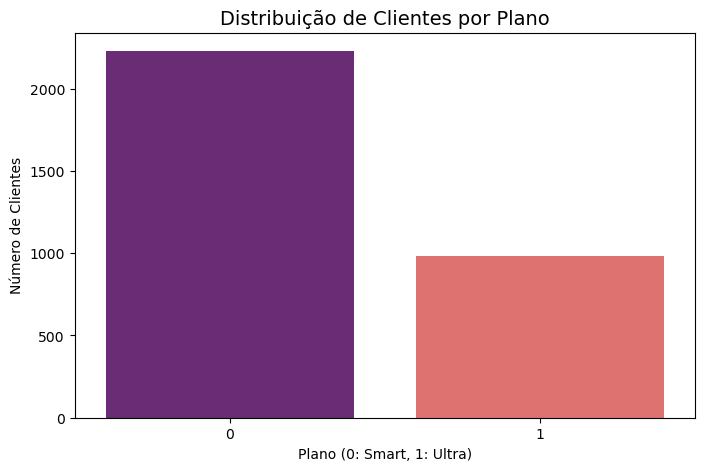

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crição de grafico para analisar numero de clientes com determinado plano
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_ultra', palette='magma')

plt.title('Distribuição de Clientes por Plano', fontsize=14)
plt.xlabel('Plano (0: Smart, 1: Ultra)')
plt.ylabel('Número de Clientes')
 
plt.show()

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_16336\453630785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_ultra', y='mb_used', palette='magma')


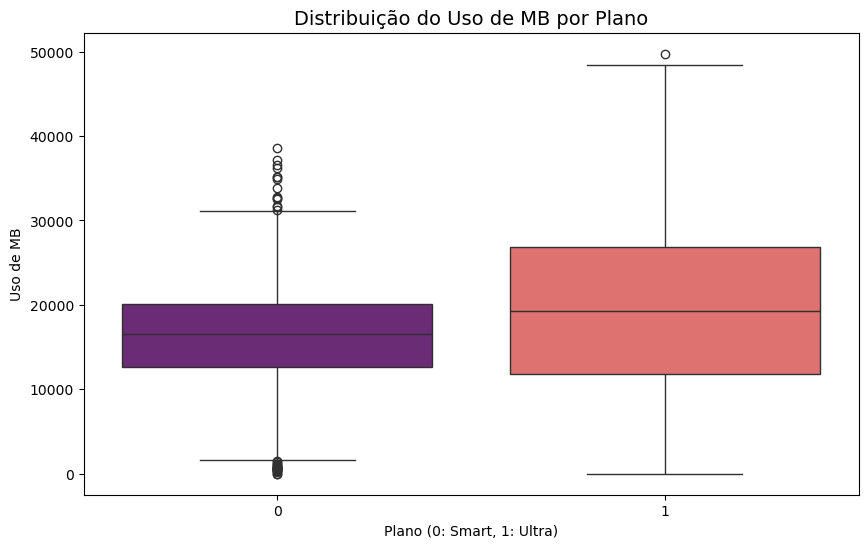

In [55]:
# Distribuição em grafico de bloxplot do uso de internet por plano
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_ultra', y='mb_used', palette='magma')

plt.title('Distribuição do Uso de MB por Plano', fontsize=14)
plt.xlabel('Plano (0: Smart, 1: Ultra)')
plt.ylabel('Uso de MB')
plt.show()

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_16336\605794633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='is_ultra', y='mb_used', palette='magma')


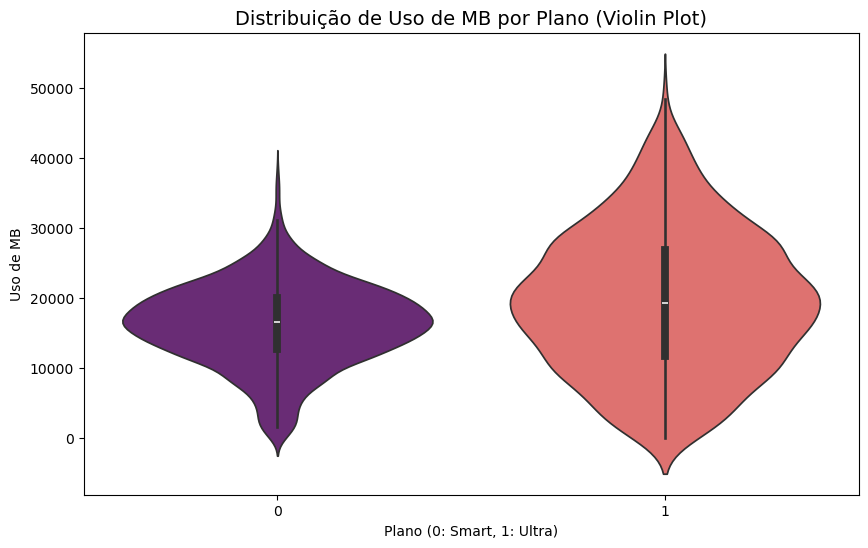

In [56]:
# Visualização alternativa mostrando a densidade da distribuição do uso de mb por plano
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='is_ultra', y='mb_used', palette='magma')
plt.title('Distribuição de Uso de MB por Plano (Violin Plot)', fontsize=14)
plt.xlabel('Plano (0: Smart, 1: Ultra)')
plt.ylabel('Uso de MB')
plt.show()

A análise dos gráficos de caixa revela padrões de comportamento de uso que diferenciam os clientes dos planos Smart e Ultra. Os gráficos de mb_used,  mostrem que a mediana (o valor central da caixa) é visivelmente maior para os usuários do plano Ultra em comparação com os do plano Smart. Essa diferença na mediana indica que, em média, os clientes do plano Ultra tendem a consumir mais dados, o que justifica a diferença entre os planos.

A clara separação nas distribuições visuais entre os grupos Smart e Ultra é a principal conclusão da análise exploratória. Ela confirma que as variáveis de comportamento do cliente, como uso de internet, são excelentes preditores para o modelo. A capacidade de diferenciar os clientes com base nesses padrões de uso é o que permitirá que o modelo de aprendizado de máquina preveja o plano correto com alta acurácia, validando a premissa do seu projeto e guiando a próxima fase de modelagem de forma eficiente.

# Separação de conjunto de dados
Criação e separação dos dados para os conjuntos de treinamento, validação e de teste

In [35]:
# Criando feature e o target que será utilizado no projeto
feature = df.drop('is_ultra', axis=1)
target = df['is_ultra']

In [36]:
# Separando 20% para o modelo teste e de validação. Deixando o de treinamento com maior parte 60%
feature_train_val, feature_test,target_train_val, target_test = train_test_split(feature,target, 
                                                 test_size=0.20, 
                                                 random_state=42)


In [37]:
feature_train, feature_val, target_train, target_val = train_test_split(feature_train_val,
                                                   target_train_val,
                                                   test_size=0.25, 
                                                   random_state=42)

In [38]:
print(f"Conjunto de Treinamento..: {len(feature_train)} linhas ({len(feature_train)/len(df):.0%})")
print(f"Conjunto de Validação....: {len(feature_val)} linhas ({len(feature_val)/len(df):.0%})")
print(f"Conjunto de Teste........: {len(feature_test)} linhas ({len(feature_test)/len(df):.0%})")

Conjunto de Treinamento..: 1928 linhas (60%)
Conjunto de Validação....: 643 linhas (20%)
Conjunto de Teste........: 643 linhas (20%)


# Investigaçao dos melhores modelos
Investigue a qualidade de diferentes modelos alterando hiperparâmetros. 

# Arvore de decisoes

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [40]:
melhor_acuracia_arvore = 0
melhor_profundidade_arvore = 0

In [41]:
for profundidade in range(1, 11):
    modelo_arvore = DecisionTreeClassifier(random_state=42, max_depth=profundidade)
    modelo_arvore.fit(feature_train, target_train)
    previsoes_validacao = modelo_arvore.predict(feature_val)
    acuracia = accuracy_score(target_val, previsoes_validacao)
    print(f"Profundidade: {profundidade}, Acurácia de Validação: {acuracia:.4f}")
    
    if acuracia > melhor_acuracia_arvore:
        melhor_acuracia_arvore = acuracia
        melhor_profundidade_arvore = profundidade

Profundidade: 1, Acurácia de Validação: 0.7418
Profundidade: 2, Acurácia de Validação: 0.7745
Profundidade: 3, Acurácia de Validação: 0.7745
Profundidade: 4, Acurácia de Validação: 0.7807
Profundidade: 5, Acurácia de Validação: 0.7714
Profundidade: 6, Acurácia de Validação: 0.7792
Profundidade: 7, Acurácia de Validação: 0.7885
Profundidade: 8, Acurácia de Validação: 0.7714
Profundidade: 9, Acurácia de Validação: 0.7854
Profundidade: 10, Acurácia de Validação: 0.7652


In [42]:
print("Resultado Final da Árvore de Decisão")
print(" ")
print(f"A melhor acurácia no conjunto de validação foi: {melhor_acuracia_arvore:.4f}")
print(f"A melhor profundidade foi: {melhor_profundidade_arvore}")

Resultado Final da Árvore de Decisão
 
A melhor acurácia no conjunto de validação foi: 0.7885
A melhor profundidade foi: 7


# Floresta aleatoria

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
melhor_acuracia_floresta = 0
melhor_estimadores_floresta = 0
melhor_profundidade_floresta = 0

In [45]:
for estimadores in range(10, 51, 10):
    for profundidade in range(1, 11):
        modelo_floresta = RandomForestClassifier(random_state=42, n_estimators=estimadores, max_depth=profundidade)
        modelo_floresta.fit(feature_train, target_train)
        previsoes_validacao = modelo_floresta.predict(feature_val)
        acuracia = accuracy_score(target_val, previsoes_validacao)
        if acuracia > melhor_acuracia_floresta:
            melhor_acuracia_floresta = acuracia
            melhor_estimadores_floresta = estimadores
            melhor_profundidade_floresta = profundidade

In [46]:
print("Resultado Final da Floresta Aleatória")
print(" ")
print(f"A melhor acurácia no conjunto de validação foi: {melhor_acuracia_floresta:.4f}")
print(f"Melhor número de estimadores: {melhor_estimadores_floresta}")
print(f"Melhor profundidade: {melhor_profundidade_floresta}")

Resultado Final da Floresta Aleatória
 
A melhor acurácia no conjunto de validação foi: 0.8040
Melhor número de estimadores: 20
Melhor profundidade: 4


# Logistica de regressão

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
modelo_logistico = LogisticRegression(random_state=42, solver='liblinear')
modelo_logistico.fit(feature_train, target_train)
previsoes_validacao = modelo_logistico.predict(feature_val)

acuracia_logistica = accuracy_score(target_val, previsoes_validacao)

In [49]:
print("Resultado Final da Regressão Logística ")
print(" ")
print(f"A acurácia no conjunto de validação foi: {acuracia_logistica:.4f}")

Resultado Final da Regressão Logística 
 
A acurácia no conjunto de validação foi: 0.7216


Podemos notar que os 3 modelos tiveram resultados bem proximos em suas melhores acuracias, porem o melhor deles foi a floresta aleatoria, que  atingiu um resultado de 0.8040 e com uma profundidade de 4. 

Com este resultado, defini que esse modelo será utilizado no conjunto de teste ao final

#  Testando o Modelo final
Verifique a qualidade do modelo usando o conjunto de teste

In [50]:
# Melhores resultados utilizando a floresta aleatoria
melhores_estimadores = 20
melhor_profundidade = 4

In [51]:
modelo_final = RandomForestClassifier(
    random_state=42, 
    n_estimators=melhores_estimadores, 
    max_depth=melhor_profundidade)

In [52]:
modelo_final.fit(feature_train, target_train)
previsoes_teste = modelo_final.predict(feature_test)
acuracia_final = accuracy_score(target_test, previsoes_teste)

In [53]:
print(f"A acurácia final do modelo no conjunto de teste foi: {acuracia_final:.4f}")
# Meta do projeto de 0.75 de acuracia
if acuracia_final >= 0.75:
    print("\nParabéns! O modelo atingiu a meta de acurácia de 75% ou mais.")
else: 
    print("O modelo não atingiu a meta de acurácia de 75%. Vamos revisar as etapas.")


A acurácia final do modelo no conjunto de teste foi: 0.8118

Parabéns! O modelo atingiu a meta de acurácia de 75% ou mais.
